
<style> table {display: block} </style> 
# Project - Programming for Data Analysis 

## Project Plan

Detailed tracking done in git project sections, see readme.md for project

- [x] Research datasets and pick a topic of interest
- [x] Select data field to populate 
- [x] Find background data for field for comparison
- [x] Distil and deduce statistics and distributions
- [x] Create models for generating sets
- [x] Create dataset
- [x] Calculate deduced fields for set from random generated fields
- [x] Explain assumptions and findings for each step

## Researching and selecting real world application of interest

This notebook will show the process used to create a data set by simulating my real-world phenomenon. The  phenomenon of choice is the fuel consumption of vehicles on the roads in Ireland and how the consumption might be influenced by drive style, gender and age distribution. We will also explore the distribution of engine size and the range of automotive manufactures and their influences on the overall dataset. 

The distribution of engine size and automotive manufacturers will be used as a guideline for simulating the distributions of manufacturer and engine sizes and the distribution of driver ages and genders from the drivers licence authority will be used to simulate the age and gender distribution of drivers.

From age and gender distributions we will then infer drive styles that will have an impact on the overall fuel consumption of the vehicle associated with the driver profile.



## Choosing a dataset

<img style="align:left" src='https://github.com/G00364778/52465_project/raw/master/img/1412756386580_wps_70_MPG_graphic_jpg.jpg' />Going through various articles on datasets and data collections across the spectrum of topics, a personal topic of interest is the factors having an effect and influence  automotive fuel efficiency.

The approach to the dataset of choice was made by looking at the vareity of datasources available and the list of lists consulted in the research is as follow:


- https://www.kaggle.com/datasets
- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://data.gov.ie/
- https://github.com/fivethirtyeight/data
- https://github.com/BuzzFeedNews
- https://opendata.socrata.com/
- https://aws.amazon.com/datasets/
- https://cloud.google.com/bigquery/public-data/
- https://en.wikipedia.org/wiki/Wikipedia:Database_download
- https://toolbox.google.com/datasetsearch

From this list the fist attractive proposition came up in data.gov.ie in the list of automotive sales for 2018 and from this was born the idea to review the fuel efficiency of vehicles on the roads today.

I've had a personal interest in fuel efficiency from a very early age in my life trying to find ways to improve the fuel efficiency of all my modes of motorised transport. 

Having reviewed several articles on the topic, there seems to be many technical reasons for less than optimal fuel efficiency and the technical issues really comes down to maintenance or rather a lack thereof. A lot of the other factors mentioned, comes down to driving style and really reflects temperament and age related qualities. Other factors coming into play is the engine size of the vehicle, the distance of the commute and weather conditions, so all in all a reasonable set of conditions that can make an interesting dataset.

There is an overwhelming amount of variables that can influence the overall fuel efficiency of a vehicle and very granular maintenance specifics like oil and fuel quality, tyres, air conditioner use and travel distance. The most basic gross factors influencing the outcome is the engine size, the weight or rather power to mass ratio, the speed, drive style, aerodynamics and mechanical resistance. 

So as a first pass this is the rough idea of data that should allow one to make reasonable estimates on fuel consumption based on this criteria.

Make  |Model  |Sub-Class|Type|CC |Cylinders|Gender|Age|Drivestyle|Serviced|Commute
------|-------|---------|----|---|---------|------|---|------- --|--------|-------
Toyota|Corolla|Verso    |MPV |1.6|4        |Male  |55 |Rational  |Annually|32  

Maybe subclass and type of vehicle is over complicating the matter and engine size alone would be sufficient.



### Defining the data values and types for the dataset



Variable  |Description                 |Data Type  |Distributions
:---------|:---------------------------|:---------:|:------------
Make      |Manufacturer                |Text       |Geometric
Model     |Model                       |Text       |    - 
CC        |Engine size in CC           |0.8-4.5    |Geometric
Cylinder  |Cylinders inferred from CC  |2-12       |    - 
Gender    |Gender of driver            |male/female|Bernoulli
Age       |Age of driver to infer style|16-99      |Normal
Drivestyle|Driver Type                 |text       |    - 
Services  |Services annually           |yes/no     |Bernoulli
Commute   |Distance of commute         |1-100      |Gaussian
Type      |Urban, Rural, Highway       |text       |Bernoulli



### Generating a list of manufacturers 
So to get an idea of where values should go, the TEA18 dataset, referenced below, was used as a guideline for distribution of types vehicle types.

The TEA18 dataset lists all private cars licensed for the first time in 2018 listed by engine capacity in cc, Car Make, Emission Band, Licensing Authority, Year and Statistic. The values of interest in the dataset is explored and reviewed in the following sections and the main idea is just to see what manufacturers are the most popular.

In [1]:
import pandas as pd                                  # Import pandas for dataframe features
pd.options.mode.chained_assignment = None            # disable warnings en errors on dataframe usage
list_url='https://github.com/G00364778/52465_project/raw/master/data/CarsIrelandbyCC.csv' # url link to csv file in github
cars=pd.read_csv(list_url)                           # import the TEA18 dataset to establish benchmarks
makes=cars[cars['Make'].str.contains('All ')==False] # filter out collection and keep manufacturers only
#makes=df[df['Make'].str.contains('All')==True]      # test result
#df.sort_values('All', ascending=False)              # sort for esy comparison
makes['pct']=((cars['All']/168327)*100)              # calculate a percentage for reference 
makes[['Make','All','pct']].sort_values('All', ascending=False).head(10)   # display the list in descending order

,Make,All,pct
41,Volkswagen,21070,12.517303
14,Ford,18657,11.083783
39,Toyota,16114,9.573033
26,Nissan,12941,7.688012
16,Hyundai,12440,7.390377
3,Audi,8815,5.236831
34,Skoda,8508,5.054448
30,Renault,7444,4.422345
5,BMW,7384,4.386700
27,Opel,7350,4.366501


So looking at the list of new motor vehicles purchased in 2018, sorted by total sales, the list seems to approximate a geometric distribution. The distribution of engine sizes seems to be similarly distributed, however regardless of the distribution type, ideally what I would like to reproduce is a random generated list from 41 manufacturers that will always yield around __12.5%__ Volkswagen's, __11%__ Ford's followed by __9.6%__ Toyota's etc..

Several hours were spent to try and reproduce the result and one sample of such an attempt is below trying to use distributions to yield this result.

In [2]:
import numpy.random as rnd
d=rnd.noncentral_chisquare(10,1,30)**2*rnd.randint(3,size=30)
d

array([  0.        , 212.99530658,  75.94048649, 191.67139192,
         0.        ,   0.        , 430.16062048,   0.        ,
         0.        , 755.19793262, 224.66373748, 190.0499622 ,
         0.        ,  33.20359197, 322.47722378, 196.00742477,
         0.        ,   0.        ,  47.48074971,   0.        ,
         0.        , 499.67259711, 345.79732947, 301.67247229,
         0.        , 132.19772863,   0.        ,   0.        ,
        63.08951909,   0.        ])

After countless hours working on the problem, and testing all kinds of distributions, the results achieved was a bit too granular for my liking and the final and most elegant solution has already been created and "secretly" exists in the numpy.random.choice library option at the fourth parameter __p__, _probability_. This important point was completely missed in dealing with this library and only stumbling on the phrase _"probability"_ and parameter __p__ in the parameter description documentation, yielded the desired results.

```python
choice(a, size=None, replace=True, p=None)

Parameters
-----------
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.
```

This approach is favoured throughout the remainder of the document and yields a very reliable and repeatable result reflecting the datasets consulted as guidelines.

### Determining the winners

The code below extracts the list of automotive manufacturers in order of popularity for later use in generating the list.

In [3]:
makes=cars[cars['Make'].str.contains('All makes')==False] # create a filtered list of manufacturers only
m=makes.sort_values('All', ascending=False)               # sort the list by All in descending order
m=list(m['Make'])                                         # filter the list by make only
print(m)                                                  # print out the list

['Volkswagen', 'Ford', 'Toyota', 'Nissan', 'Hyundai', 'Audi', 'Skoda', 'Renault', 'BMW', 'Opel', 'Kia', 'Peugeot', 'Vauxhall', 'Mercedes Benz', 'Citroen', 'Dacia', 'Mazda', 'Seat', 'Honda', 'Volvo', 'Suzuki', 'Mitsubishi', 'Mini', 'Land Rover', 'Fiat', 'Lexus', 'Jaguar', 'Saab', 'Subaru', 'All other makes', 'Porsche', 'Alfa Romeo', 'Ssangyong', 'Jeep', 'Smart', 'Chevrolet', 'Rover', 'Chrysler', 'Daihatsu', 'Daewoo', 'Austin', 'Dodge']


Arrange automotive manufacturers in order of popularity:
```python
makes = ['Volkswagen', 'Ford', 'Toyota', 'Nissan', 'Hyundai', 'Audi', 'Skoda', 'Renault', 'BMW', 'Opel', 'Kia', 'Peugeot', 'Vauxhall', 'Mercedes Benz', 'Citroen', 'Dacia', 'Mazda', 'Seat', 'Honda', 'Volvo', 'Suzuki', 'Mitsubishi', 'Mini', 'Land Rover', 'Fiat', 'Lexus', 'Jaguar', 'Saab', 'Subaru', 'All other makes', 'Porsche', 'Alfa Romeo', 'Ssangyong', 'Jeep', 'Smart', 'Chevrolet', 'Rover', 'Chrysler', 'Daihatsu', 'Daewoo', 'Austin', 'Dodge']
```

In order to to create a realistic simulation resembling the finding a reasonably narrow and specific distribution must be followed.

### The working code to generate the distribution

Testing the generator and distribution results of a list of vehicles by manufacturer.

In [4]:
from collections import Counter as count # import the counter for validation of the generator
nsamples=10000                           # Setting the value for the glabal list length 

makes['pct']=((makes['All']/sum(makes['All']))) # create a percentage column value that adds up to one - required by propability
makes[['Make','All','pct']].sort_values('All', ascending=False) #sort the list and create lists for validation purposes
manufacturers=list(makes['Make']) # generate a manufacturers list from the makes dataframe
probability=list(makes['pct']) # create the probabbility distribution list for the list
#sum(probability)  # test the list forcompatibility to the fucntion requirements, i.e. mist add up to one
t=rnd.choice(manufacturers,nsamples,p=probability) # create a 1000 samples
count(t).most_common() # count and show them

[('Volkswagen', 1285),
 ('Ford', 1042),
 ('Toyota', 929),
 ('Nissan', 825),
 ('Hyundai', 751),
 ('Audi', 544),
 ('Skoda', 500),
 ('Opel', 467),
 ('BMW', 443),
 ('Renault', 437),
 ('Peugeot', 346),
 ('Kia', 337),
 ('Vauxhall', 291),
 ('Citroen', 238),
 ('Mercedes Benz', 218),
 ('Dacia', 210),
 ('Seat', 182),
 ('Mazda', 174),
 ('Honda', 138),
 ('Volvo', 129),
 ('Suzuki', 84),
 ('Mini', 81),
 ('Mitsubishi', 77),
 ('Land Rover', 61),
 ('Fiat', 51),
 ('Lexus', 38),
 ('Jaguar', 27),
 ('Saab', 23),
 ('Subaru', 18),
 ('All other makes', 12),
 ('Jeep', 8),
 ('Porsche', 8),
 ('Ssangyong', 7),
 ('Chevrolet', 5),
 ('Alfa Romeo', 5),
 ('Rover', 4),
 ('Chrysler', 3),
 ('Smart', 1),
 ('Daihatsu', 1)]

This approach yields exactly what I was hoping to achieve and reproduces the same distribution percentages from the sample data use for the model. Engine size can be derived in a similar fashion, bearing in mind that all manufacturers might not have all engine sizes, however for the purposes of this exercise this is deemed sufficient to match the overall criteria. 


### Distilling Engine sizes

In order to add engine sizes to the dataset, a review of the engine statistics and distributions is done in the following section and we briefly explore to effect of ignoring manufacturer specific lack of representation in some engine size categories.

In [5]:
makes=cars[cars['Make'].str.contains('All makes')==True] # Import the summary line only from the dataframe showing numbers by cc
makes

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
0,All makes,168327,881,10210,20204,15272,18800,43824,48599,7407,3130


To better make sense of this result, it's transposed and cleaned up and stored in a csv file for easier reference and access in the following sections. This is then stored and referenced from my git repository.

In [6]:
cc_dist_url='https://github.com/G00364778/52465_project/raw/master/data/cc_dist.csv' # set the url for the raw csv file
ccd=pd.read_csv(cc_dist_url).sort_values('pct', ascending=False)     # read the file from the url to a dataframe ccd 
ccd                                                                  # display ccd

,cc,count,pct
6,2000,48599,0.288718
5,1600,43824,0.260350
2,1300,20204,0.120028
4,1500,18800,0.111687
3,1400,15272,0.090728
1,1000,10210,0.060656
7,2400,7407,0.044004
8,2500,3130,0.018595
0,900,881,0.005234


Reviewing the engine size distribution results like this yielded some surprising results with the biggest surprise being that the most common engine size, contrary to popular believe, is a 2000 cc engine, closely followed by the 1600 cc category. The gap in the categories, i.e. the jump from 1600 to 2000,  probably add to the big percentage in this grouping, however the two groupings accounts for more than 50% of the vehicle population on the road. The remaining 45% is shared by 1000-1500 cc and 4.4% in 2.4cc category with the balance of around 1.5% in the remaining categories. So very few above 2.4k cc and even less below 900cc, almost negligible. 

<img src="https://github.com/G00364778/52465_project/raw/master/img/cc_plot.png">

So a list in the order of popularity would be:

```python
cc_order=[2000,1600,1300,1500,1400,1000,2400,>2400,<900]
```

### Distribution of engine sizes and variance by manufacturers

The order of manufacturers is actually not that surprising and aligns with popular conversation on the subject with petrol heads and when sorting the complete list by all or various engine size columns creates minor shifts. The shifting is really down to engine sizes more prevalent by specific manufacturers, for example Toyota would not make 900cc vehicles and the <900 cc category is dominated by Nissan, with relatively low volumes. 

It is quite surprising and then again very satisfying that this information can be derived from official datasets that is already publicly available. It is an area that must be explored more deeply and frequently for knowledge and gain.

For the sake of completeness before proceeding to the other variables required for the list, let us investigate the variance of manufacturers by engine sizes for this set just to ensure that the assessments made holds true by validating the data. 

In [7]:
makes=cars[cars['Make'].str.contains('All makes')==False]  # create a filtered list of unique manufacturers only 
makes.sort_values('<900', ascending=False).head(3)         # filter by less than 900cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
26,Nissan,12941,496,53,5016,46,6164,1032,93,12,29
9,Dacia,3696,139,0,358,1,3198,0,0,0,0
30,Renault,7444,109,60,1843,45,4965,275,122,17,8


In [8]:
makes.sort_values('1000', ascending=False).head(3)         # filter and sort by 1000cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
39,Toyota,16114,0,3176,284,6601,626,814,4325,178,110
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56
16,Hyundai,12440,0,1478,1554,1311,20,1913,5388,772,4


In [9]:
makes.sort_values('1300', ascending=False).head(3)       # filer and sort by 1300cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
26,Nissan,12941,496,53,5016,46,6164,1032,93,12,29
14,Ford,18657,0,1065,2544,486,1258,9638,3491,135,40
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56


In [10]:
makes.sort_values('1400', ascending=False).head(3)       # filter and sort by 1400cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
39,Toyota,16114,0,3176,284,6601,626,814,4325,178,110
27,Opel,7350,0,52,717,1961,39,1998,2581,2,0
16,Hyundai,12440,0,1478,1554,1311,20,1913,5388,772,4


In [11]:
makes.sort_values('1500', ascending=False).head(3)        # filter and sort by 1500cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
26,Nissan,12941,496,53,5016,46,6164,1032,93,12,29
30,Renault,7444,109,60,1843,45,4965,275,122,17,8
9,Dacia,3696,139,0,358,1,3198,0,0,0,0


In [12]:
makes.sort_values('1600', ascending=False).head(3)        # filter and sort by 1600cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
14,Ford,18657,0,1065,2544,486,1258,9638,3491,135,40
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56
34,Skoda,8508,0,942,1499,43,225,4008,1791,0,0


In [13]:
makes.sort_values('2000', ascending=False).head(3)        # filter and sort by 2000cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
41,Volkswagen,21070,6,1966,1959,483,399,9080,7119,2,56
3,Audi,8815,0,64,115,169,106,1360,6436,3,562
5,BMW,7384,37,0,0,0,458,52,6179,8,650


In [14]:
makes.sort_values('2400', ascending=False).head(3)        # filter and sort by 2400cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
23,Mercedes Benz,4027,0,0,0,6,506,771,124,2287,333
22,Mazda,3049,0,0,0,326,289,170,197,2064,3
16,Hyundai,12440,0,1478,1554,1311,20,1913,5388,772,4


In [15]:
makes.sort_values('>2400', ascending=False).head(3)        # filter and sort above 2400cc

,Make,All,<900,1000,1300,1400,1500,1600,2000,2400,>2400
5,BMW,7384,37,0,0,0,458,52,6179,8,650
3,Audi,8815,0,64,115,169,106,1360,6436,3,562
21,Lexus,657,0,0,0,0,0,0,126,56,475


### The conclusion on engine sizes

Manufacturer order vary some between engine sizes since everyone does not manufacture the same ranges or engines, for example BMW and Mercedes dominates above the 2.4 category. 

The second aspect considered is the additional complexity introduced across 41 unique manufacturers to account for the engine sizes in the modelling of the generated dataset and the net effect overall is almost negligible as a result of the overall combined manufacturer popularity distribution, for example while Mercedes dominates the 2400 cc category, the overall representation of the manufacturer is only 2.39%, so roughly half this number around 1.2% that I will assign a bigger engine to the wrong manufacturer. All in all the set will balance as the cc distribution probability will still be accurately applied to the overall set. We will therefore not granularly distinguish engine size by manufacturer when generating the set, but rather use the overall set distribution as a guideline for all.

## Modelling the engine sizes

In [16]:
count(rnd.choice(ccd['cc'],nsamples,p=ccd['pct'])).most_common() # count the number of vehicles per cc and sort by most common
#ccd

[(2000, 2883),
 (1600, 2672),
 (1300, 1145),
 (1500, 1102),
 (1400, 915),
 (1000, 612),
 (2400, 447),
 (2500, 179),
 (900, 45)]

In [17]:
df=pd.DataFrame(t, columns=['Make'])                 # create the dataframe for the dataset adding _t_ to _make_
df['cc']=rnd.choice(ccd['cc'],nsamples,p=ccd['pct']) # append the engine size tested above to the set under cc

In [18]:
#count(df['Make']).most_common()  # various test for validation during creation.
#count(df['cc']).most_common()    # Test the result
#df                               # display the result , commented for final submisison 

## More Questions to answer

Variable  |Description                 |Data Type  |Distributions
----------|----------------------------|-----------|-------------
Make      |Manufacturer                |Text       |Geometric
Model     |Model                       |Text       |    - 
CC        |Engine size in CC           |0.8-4.5    |Geometric
Cylinder  |Cylinders inferred from CC  |2-12       |    - 
Gender    |Gender of driver            |male/female|Bernoulli
Age       |Age of driver to infer style|16-99      |Normal
Drivestyle|Driver Type                 |text       |    - 
Services  |Services annually           |yes/no     |Bernoulli
Commute   |Distance of commute         |1-100      |Gaussian
Type      |Urban, Rural, Highway       |text       |Bernoulli

The next couple of questions that needs to be addressed to generate a complete dataset, is to see if we can determine the distributions of drivers by gender and age, the commute distance range for our datasets commuters and the service intervals observed by the average individuals. 

Then we need to see if we can infer drive styles from this data somehow. 


### Drivers by age

firstly In this section we will review the drivers by gender and age and use the national licensing authority dataset for 2013 to determine the gender distribution and age distribution of drivers by licence category.


In [19]:
driver_type_url='https://github.com/G00364778/52465_project/raw/master/data/P-TRANOM2013_2.5.csv' # git url for driver list
d=pd.read_csv(driver_type_url)                              # read the git csv file ito a dataframe d
d['pct']=d['Total']/sum(d['Total'])*100                     # add a percentage column
d['ratio']=d['Female']/(d['Male']+d['Female'])              # and calculate the male/female age ration 
#list(d['Age'])
d                                                           # display the list and calculations

,Age,Male,Female,Unknown,Total,pct,ratio
0,17 - 20,19498,12136,0,31634,1.310226,0.383638
1,21 - 24,58592,48373,0,106965,4.430306,0.452232
2,25 - 29,110192,103236,0,213428,8.839820,0.483704
3,30 - 39,292016,278584,1,570601,23.633311,0.488230
4,40 - 49,276956,251080,2,528038,21.870425,0.475498
5,50 - 59,230547,199151,0,429698,17.797351,0.463467
6,60 - 69,181719,140179,0,321898,13.332461,0.435476
7,70 - 79,95496,67540,0,163036,6.752670,0.414264
8,80 - 100,30273,18815,7,49095,2.033430,0.383291


So the __pct__ column calculates the overall percentage that the age group represents and the __ratio__ column the ration of male to female drivers for the age group, so females vary from 38% to 48% representation for all age categories.

[]

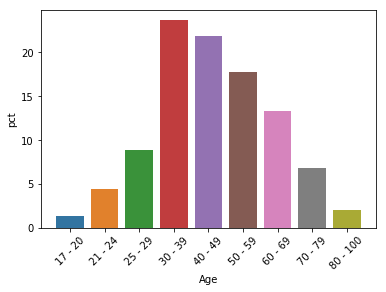

In [20]:
import warnings                                                 # add the code to suppress seaborn future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns                                           # import seaborn libabry for plotting
import matplotlib.pyplot as pl                                  # import matplotlib for controlling plots 
%matplotlib inline

barplot=sns.barplot('Age','pct',data=d, orient=90)              # generate a bar plot by age distribution
for item in barplot.get_xticklabels():                          # orientate the labels for clear readability
    item.set_rotation(45)
pl.plot()                                                       # show the plots

So it looks like this distribution might be achieved using a negative binomial and then creating a random generator to recreate the distribution for us. 

In [21]:
n=100-(rnd.negative_binomial(2.015, 0.1, 150)+17)
n.sort()
n

array([28, 29, 31, 34, 36, 38, 38, 38, 38, 40, 40, 40, 43, 44, 46, 46, 46,
       47, 49, 49, 50, 50, 50, 52, 52, 53, 54, 55, 56, 56, 56, 56, 56, 56,
       57, 57, 58, 58, 59, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 62, 62,
       62, 63, 63, 63, 64, 64, 65, 65, 65, 65, 66, 66, 66, 66, 66, 66, 67,
       67, 67, 68, 68, 68, 68, 69, 69, 69, 69, 69, 70, 70, 70, 70, 70, 71,
       71, 71, 71, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 74,
       74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 77,
       77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 78, 78, 78, 78, 79, 79, 79,
       79, 80, 80, 80, 80, 81, 81, 81, 81, 82, 82, 82, 82, 83])

Unfortunately, having spend too much time on the topic once again to try and achieve perfection in my simulation matching the real world efforts, sadly this approach fails to yield accurately what I want to achieve and I will have to revert to a normal distribution with tight controls over the outcome and this will result in a slightly higher result on the lower age categories than the real world scenario investigated above. Still, trying any kind of distribution fails to yield the kinds of numbers repeatably to show the age distribution I would like to see. 

So in the end, to get the perfect dataset, I suppose it is a good idea to stick to what works and for the remainder of the set, sticking to what works well with the aim of producing a set that fits the needs and represents the probability modelled on other findings.


In [22]:
import numpy as np                                                # import numpy to generate randowm number
import numpy.random as rnd
age=[17, 21, 25, 30, 40, 50, 60, 70, 80]                          # create an array of ages to use
dist=np.array([1.3, 4.5, 8.9, 23.6, 21.8, 17.7, 13.3, 6.7, 2.2])  # set the distribution probabilities for the ages above
dist=dist/100                                                     # devide the probabilities for campatibility to random choice

a=rnd.choice(age,nsamples,p=dist) # generate the age set from the tables above
b=rnd.randint(-5,5,nsamples)      # add futher ramdomisation to the selection to create agres between sample set in list
df['Age']=a+b                     # add the result of the random choice and offset to the dataframe list
df.head(5)

,Make,cc,Age
0,Nissan,1600,45
1,Volkswagen,1000,51
2,Citroen,1600,29
3,Toyota,2000,27
4,Vauxhall,1500,51


So testing my list for age and gender representation yields the ratios from the ample data. 

### Driver by Gender

In the next section we will be setting up the drivers by gender and we look at the average for the distribution and apply the same logic as used in the previous section, i.e. compare the ratio of distribution and use the distribution values to create a new set. 


In [23]:
np.average(d['ratio']) # calculate the overall ratio for age distribution from the complete list

0.4422001340001868

So the female to male ration is 44% females to males for the complete list. We will use this ratio in our random generator. We also need to calculate the percentage of drivers with no gender assigned.

In [24]:
(sum(d['Unknown'])/(sum(d['Male'])+sum(d['Female'])+sum(d['Unknown'])))*1 # calculate the percentage of unknow drivers


4.141827780315798e-06

About 4 drivers in a million drivers are of unknown gender.

In [32]:
import numpy as np                                 # import numpy for array and random number generation
import numpy.random as rnd
gender=['male','female','unknown']                 # A list of gender choices
gdist=np.array([0.55999,0.44,0.00001])             # The distribution of the gender choices
#count(rnd.choice(gender,1000000,p=gdist))         # test the results, commented for final submission
df['Gender']=rnd.choice(gender,nsamples,p=gdist)   # And adding the gender distribution to the dataframe
#df.head(5)                                        # test the results, commented display for final submission.head(5).

### Setting the drive styles

The drive style will affect the vehicle specif fuel consumption and we distribute drive style proportionally in styles by the distribution factors listed.

In the last section we use the style to tweak the final fuel consumption math using the criteria generated here.

In [26]:
styles=['speedy','slow','nervous','distracted','rational']  # defining the drive styles
sdist=[0.22,0.04,0.06,0.07,0.61]                            # setting the distributions of drive styles
#sum(sdist)                                                 # Testing the distribution math
df['DriveStyle']=rnd.choice(styles,nsamples,p=sdist)        # add the result to the dataframe 
#df

### Setting the Service check field

Similarly we assume that 33% percent of drivers in Dublin do no service their vehicles regularly and this value will later factor into the fuel efficiency calculations.

In [27]:
service=['yes','no']                                         # defining the drive styles
svcdist=[0.67,0.33]                                          # setting the distributions of drive styles
#sum(sdist)                                                  # Testing the distribution math
df['Serviced']=rnd.choice(service,nsamples,p=svcdist)        # add the result to the dataframe 
#df

### Commute details - distance and type

Then lastly we calculate a daily commute of 20 miles with a 50 mile variance and we add a further variance based on urban, rural of highway conditions that will be used in the final fuel efficiency math.

In [28]:
#service=['yes','no']                                        # defining the drive styles
#svcdist=[0.67,0.33]                                         # setting the distributions of drive styles
#sum(sdist)                                                  # Testing the distribution math
df['Daily_commute']=rnd.randint(20,50,nsamples)              # add the result to the dataframe 
#df

In [29]:
commute_type=['urban','rural','highway']                        # defining the commute types
svcdist=[0.44,0.07,0.49]                                        # setting the distributions of drive styles
#sum(sdist)                                                     # Testing the distribution math
df['Commute_type']=rnd.choice(commute_type,nsamples,p=svcdist)  # add the result to the dataframe 
#df

### Add a calculated fuel consumption

Some assumptions are made for the sake of a further distributed mileage calculation on the dataset that is not necessarily based on statistical evidence, for example that male drivers are all more aggressive than female drivers. 

In [30]:
mpg=80.00                                            # baseline mpg for 1000cc - 18km/l @90km/h

for i, row in df.iterrows():
    if row['Gender']=='male': gender=1.0            # ad a gender skew assuming males are more agressive drivers
    else:gender=1.05
    if row['DriveStyle']=='speedy': style=0.9        # assuming speedy drivers gets 10% less
    elif row['DriveStyle']=='nervous': style=1.05    # and assuming nervous drives get 5% more
    else: style=1.001                                  # and the rest gets the calculated default mileage
    if row['Serviced']=='no': serviced=0.89999       # assuming unservices vehicles will be less efficient
    else: serviced=1.0
    if row['Commute_type']=='urban':ctype=0.77777    #urban mileage 23% less 
    if row['Commute_type']=='rural':ctype=0.899999   # rural 10% less 
    if row['Commute_type']=='highway':ctype=1.01111  # motorway is about standard
    if row['Make']=='Saab': mk=1.05                  # and skodas are more fuel efficient than the rest
    else: mk=1
    mpg_calc=mpg*(1000/row['cc'])*gender*style*serviced*ctype*mk   # calculate the mileage
    df.at[i,'mpg'] = mpg_calc                                      # insert the value into the table
    df.at[i,'l_day']=row['Daily_commute']/(mpg_calc/4.5*1.6)*2     #calculate the litres per day
#df['mpg'].describe()
df                                                                 # display the final dataset

,Make,cc,Age,Gender,DriveStyle,Serviced,Daily_commute,Commute_type,mpg,l_day
0,Nissan,1600,45,male,rational,yes,47,urban,38.927388,6.791491
1,Volkswagen,1000,51,male,rational,no,30,urban,56.054817,3.010446
2,Citroen,1600,29,male,rational,yes,32,highway,50.606055,3.556887
3,Toyota,2000,27,male,rational,no,43,highway,36.435955,6.638360
4,Vauxhall,1500,51,male,rational,yes,47,urban,41.522548,6.367023
5,Skoda,2500,43,male,rational,no,33,urban,22.421927,8.278727
6,Ford,1500,37,male,speedy,no,26,highway,43.679467,3.348255
7,Mazda,1600,58,male,rational,yes,35,urban,38.927388,5.057493
8,Audi,1300,18,female,rational,no,34,highway,58.858081,3.249341
9,Seat,2000,43,male,rational,yes,40,urban,31.141911,7.224990


This concludes the generation of the dataset and the last step below commits it all the a comma separated file for convenience.

In [31]:
df.to_csv('data/generated_dataset.csv',index=False) # Save the dataset to a file

## Testing the dataset for distribution

A quick test to proof the validation of the dataset, we will compare the distribution of manufacturers and the gender distribution and compare this to the research data for validation.

In [48]:
import pandas as pd           # import pandas and read in the previously generated dataset stored on the git repository
ds=pd.read_csv('https://github.com/G00364778/52465_project/raw/master/data/generated_dataset.csv')
# ds=pd.read_csv('data/generated_dataset.csv') # or uncomment to use the current local set
ds.head(3)                                     # and display the head just to make sure it was read properly

,Make,cc,Age,Gender,DriveStyle,Serviced,Daily_commute,Commute_type,mpg,l_day
0,Citroen,1500,29,female,speedy,no,37,urban,33.599291,6.194327
1,Seat,2000,67,male,rational,yes,35,highway,42.466620,4.635994
2,Volkswagen,1300,25,male,rational,yes,49,highway,65.333262,4.218755


In [39]:
from collections import Counter as count   # import the counter feature from the collections library 
count(ds.Make).most_common(5)              # and count and sort the list by most common

[('Volkswagen', 1285),
 ('Ford', 1135),
 ('Toyota', 964),
 ('Nissan', 730),
 ('Hyundai', 682)]

The result compares to the research on the topic and in range with the distribtion criteria set.

```python
[('Volkswagen', 1285),
 ('Ford', 1042),
 ('Toyota', 929),
 ('Nissan', 825),
 ('Hyundai', 751),
```
In the following section we will test the gender distribution for 44% females to males.

In [46]:
print(count(ds.Gender).most_common(5))

[('male', 5631), ('female', 4369)]


The results matches the expected distribution.

## Conclusions

There is a lot of free data available to explore and shed light on global questions being asked and quite surprisingly easy to distil and arrive at clear conclusive answers to the questions, for example the distribution of male to female drives in Ireland. 

The random.choice option provides a very accurate and repeatable selection process for reproducing sets repeatable with non standard distribution types.

It is very easy to make the wrong assumptions on limited datasets or demographically biased sets affecting choices for example the European taxation on bigger engines sizes compared to a US market where this is not applicable. 

It is much more difficult than anticipated to generate meaningful representative datasets and a lot of time went into the background research and event testing code to achieve the end result.

Our perceptions are mostly wrong, for example I would have imagined a bigger dominance of male drivers when in fact it is very close to even. The other wrong perception was that small cars in more abundant on the roads when in fact the bigger engine sizes are more prevalent. 

## References

1. __[5 Ways to Find Interesting Data Sets](https://www.dataquest.io/blog/5-ways-to-find-interesting-data-sets/)__
1. __[18 places to find data sets for data science projects](https://www.dataquest.io/blog/free-datasets-for-projects/)__
1. __[100+ Interesting Data Sets for Statistics](http://rs.io/100-interesting-data-sets-for-statistics/)__
1. __[19 Free Public Data Sets for Your First Data Science Project](https://www.springboard.com/blog/free-public-data-sets-data-science-project/)__
1. __[Cool Data Sets I’ve found](https://towardsdatascience.com/cool-data-sets-ive-found-adc17c5e55e1)__
1. __[Summary of Links to data sources](http://hdip-data-analytics.com/resources/data_sources)__
1. __[13 factors that increase fuel consumption](https://www.monitor.co.ug/Business/Auto/13-factors-that-increase-fuel-consumption/688614-2738644-b69hkkz/index.html)__
1. __[Many Factors Affect Fuel Economy](https://www.fueleconomy.gov/feg/factors.shtml)__
1. __[Want Your MPG? 10 Factors That Affect Fuel Economy](https://www.newgateschool.org/blog/entry/want-your-mpg-10-factors-that-affect-fuel-economy)__
1. __[How to Reduce Fuel Consumption](https://www.carsdirect.com/car-buying/10-ways-to-lower-engine-fuel-consumption)__
1. __[8 Main Causes of Bad Gas Mileage](https://www.carsdirect.com/car-buying/8-main-causes-of-bad-gas-mileage)__
1. __[Table 2.5     Number of current driving licences by age and gender at 31/12/2013](https://www.cso.ie/en/releasesandpublications/ep/p-tranom/transportomnibus2013/vehicles/driverandvehicletesting/)__
1. __[Cars Dataset](http://www.rpubs.com/dksmith01/cars)__
1. __[The 5 types of drivers on the road](https://rsadirect.ae/blog/5-types-drivers-road)__
1. __[TEA18 - Private Cars Licensed for the First Time](https://data.gov.ie/dataset/tea18-ime-by-engine-capacity-cc-car-make-emission-band-licensing-authority-year-and-statistic-b6cc)__
1. __[Github Markdown reference](https://guides.github.com/features/mastering-markdown/)__
1. __[Jupyter Markdown reference](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)__
1. __[Latex Reference](http://www.malinc.se/math/latex/basiccodeen.php)__